# Potato Disease Classification

### Import all the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import random

### Display Sample Images from PlantVillage Dataset



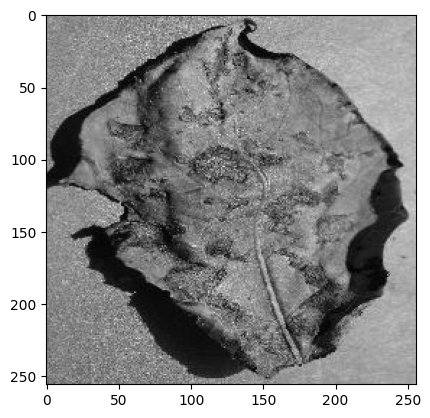

In [3]:
# Updated base directory and categories
DATADIR = "../PlantVillage"  # Updated base dir
CATEGORIES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Display a sample image from each category
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # constructing the path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [ ]:
print(img_array)

[[122 160 147 ... 173 170 168]
 [130 147 141 ... 183 179 175]
 [149 133 131 ... 178 174 171]
 ...
 [148 116 129 ... 160 161 161]
 [107 104 125 ... 162 163 164]
 [146  92 127 ... 169 172 173]]


In [ ]:
img_array.shape

(256, 256)

### Resizing Images to a Uniform Size of 256x256 Pixels


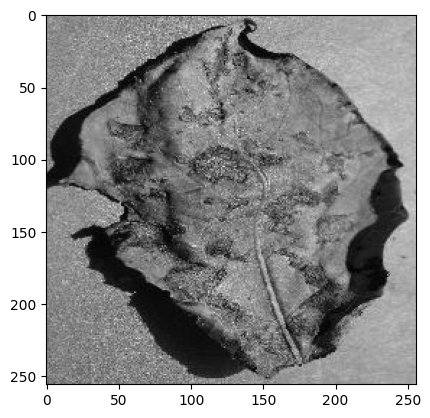

In [ ]:
IMG_SIZE = 256

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   #every image now will be of 50 x 50
plt.imshow(new_array, cmap = 'gray')

### Spliting Dataset into Training and Test Subsets

1. Training: Dataset to be used while training
2. Test: Dataset to be tested against after we trained a model


In [ ]:
# CREATING TRAINING AND TESTING DATA
training_data = []
testing_data = []
split_ratio = 0.8  # 80% for training, 20% for testing

def create_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # path to categories
        class_num = CATEGORIES.index(category)  # index for the category
        images = os.listdir(path)
        # Shuffle the images to ensure random distribution
        random.shuffle(images)
        split_index = int(len(images) * split_ratio)  # Calculate split index

        # Split images into training and testing data
        train_images = images[:split_index]
        test_images = images[split_index:]

        # Create training data
        for img in train_images:
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resizing images
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

        # Create testing data
        for img in test_images:
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resizing images
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass

create_data()


# Preparing the features and labels for training
X_train = []
y_train = []

In [ ]:
print(len(training_data))
print(len(testing_data))

1721
431


In [ ]:
# Preparing the features and labels for training
X_train = []
y_train = []

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # last value '1' for grayscale images
y_train = np.array(y_train)

# Preparing the features and labels for testing
X_test = []
y_test = []

for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)

In [ ]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # last value '1' for grayscale images
y_test = np.array(y_test)


In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

### Model Architecture
This model employs a Convolutional Neural Network (CNN) architecture designed for image classification. The architecture includes two convolutional layers followed by max pooling layers to downsample the feature maps. The final layers consist of a flattening layer and two dense layers, with the last layer utilizing a Softmax activation function for multi-class classification across the specified categories.

In [ ]:
# Build the model
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=X_train.shape[1:], activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(CATEGORIES), activation='softmax')
])


c:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 988ms/step - accuracy: 0.6698 - loss: 1.3876 - val_accuracy: 0.2312 - val_loss: 13.3444
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 49s 998ms/step - accuracy: 0.9131 - loss: 0.2267 - val_accuracy: 0.2775 - val_loss: 11.7970
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9680 - loss: 0.0877 - val_accuracy: 0.2775 - val_loss: 12.3291
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.9863 - loss: 0.0454 - val_accuracy: 0.2948 - val_loss: 13.5433
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9912 - loss: 0.0322 - val_accuracy: 0.2775 - val_loss: 14.3768
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9992 - loss: 0.0086 - val_accuracy: 0.2775 - val_loss: 18.2842
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.2775 - val_loss: 20.9905
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 863ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.

In [ ]:

# Optionally evaluate the model using testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.9199 - loss: 0.7883
Test accuracy: 0.8793503642082214


### Plotting the Accuracy and Loss Curves

In [ ]:
# Plotting the training history
EPOCHS = 10  # Update this if you change the number of epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

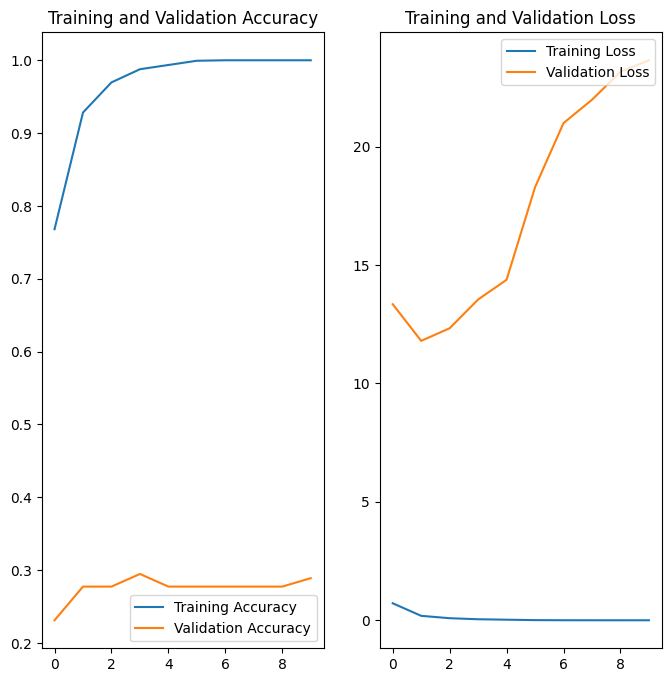

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Write a function for inference

In [ ]:
# 'model' is already trained and class_names are defined as follows
class_names = CATEGORIES  # Using categories defined in your original code

# Function to make predictions on a single image
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to array
    img_array = tf.expand_dims(img_array, 0)  # Expand dimensions to match model input
    predictions = model.predict(img_array)  # Make predictions

    predicted_class = class_names[np.argmax(predictions[0])]  # Get class with highest probability
    confidence = round(100 * np.max(predictions[0]), 2)  # Calculate confidence
    return predicted_class, confidence



### Now run inference on few sample images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


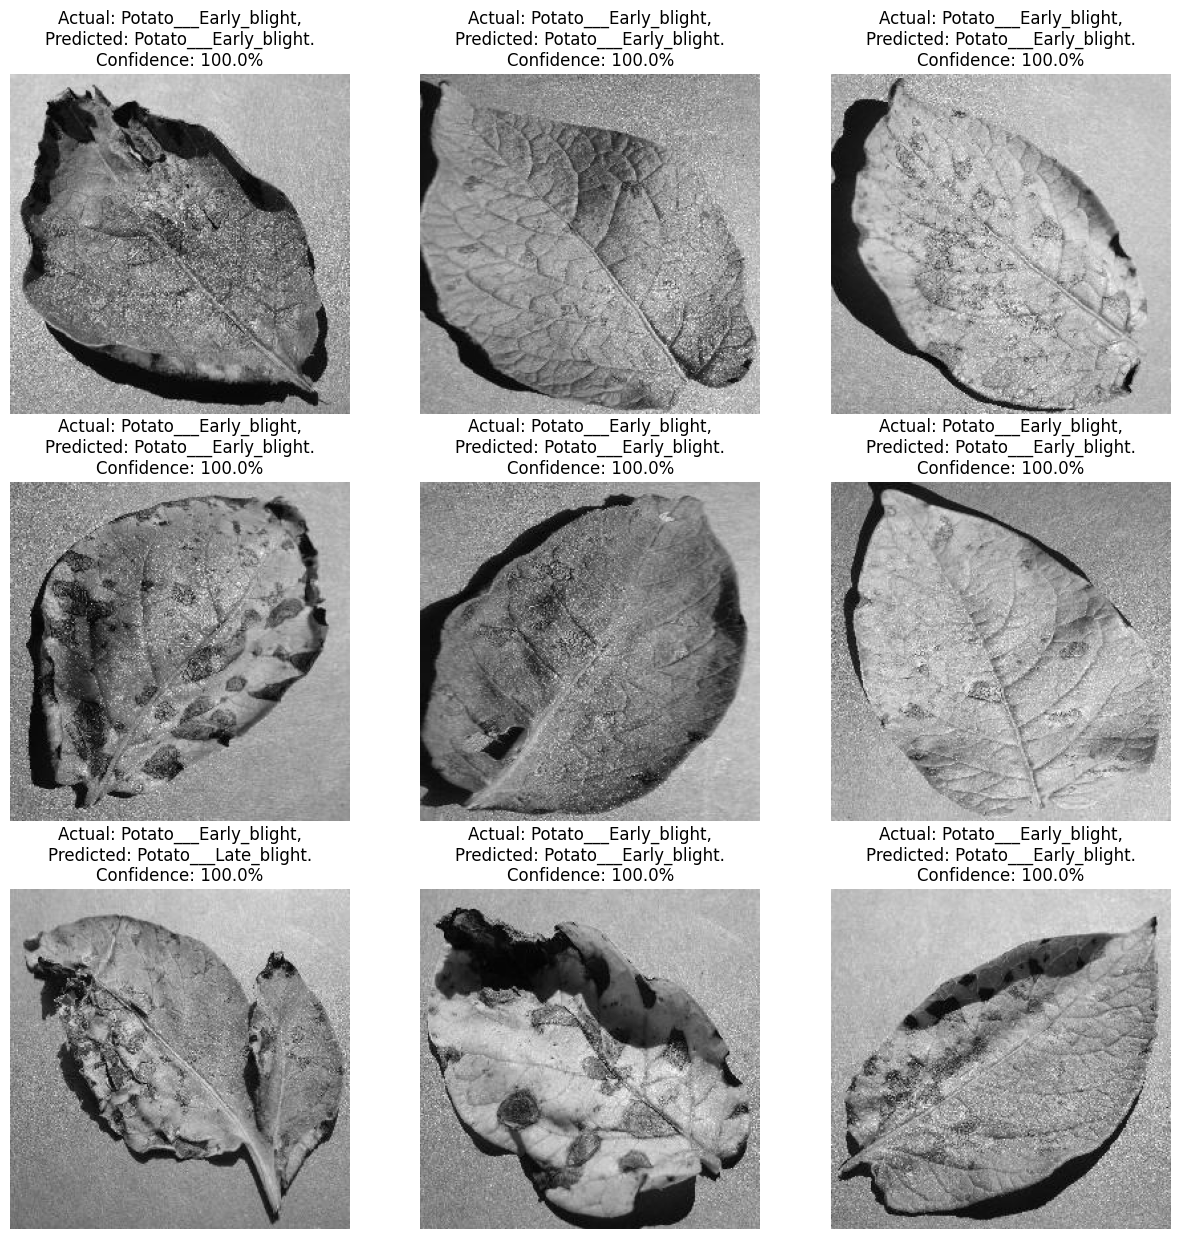

In [ ]:
# Visualize predictions on a batch of test data
plt.figure(figsize=(15, 15))

# Unpacking images and labels from testing_data
for i in range(9):  # Display 9 images
    # Get the image and label from testing_data
    image, label = testing_data[i]

    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.astype("uint8"), cmap='gray')  # Display the image (assuming grayscale)

    # Predict the class and confidence
    predicted_class, confidence = predict(model, image)
    actual_class = class_names[label]  # Get the actual class

    # Set the title with actual and predicted classes
    plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}%")
    plt.axis("off")  # Hide axis

plt.show()  # Show the plot